In [3]:
!pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

     |████████████████████████████████| 189 kB 3.1 MB/s eta 0:00:01


In [37]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [38]:
cardiacData = pd.read_csv("Cardiac.csv")

In [39]:
cardiacData.head(10)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no
5,Female,0,1,0,1,0,0,0,1,0,0,0,no
6,Male,0,1,0,0,0,0,1,1,0,0,0,no
7,Female,0,1,0,1,0,0,0,1,0,0,0,no
8,Male,0,1,0,1,0,0,0,1,0,0,0,no
9,Male,0,1,0,0,0,0,1,1,0,0,0,no


In [40]:
cardiacData.shape

(889, 13)

In [41]:
cardiacData.nunique

<bound method DataFrame.nunique of      Gender  Chain_smoker  Consumes_other_tobacco_products  HighBP  Obese  \
0      Male             1                                1       0      1   
1      Male             0                                1       0      1   
2      Male             0                                1       0      1   
3      Male             0                                1       0      1   
4      Male             0                                0       0      0   
..      ...           ...                              ...     ...    ...   
884  Female             0                                1       0      1   
885    Male             0                                1       0      1   
886    Male             0                                0       1      1   
887  Female             0                                1       0      0   
888    Male             1                                1       0      1   

     Diabetes  Metabolic_syndrome  Use_o

In [42]:
cardiacData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [43]:
cardiacData.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [44]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [45]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [46]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

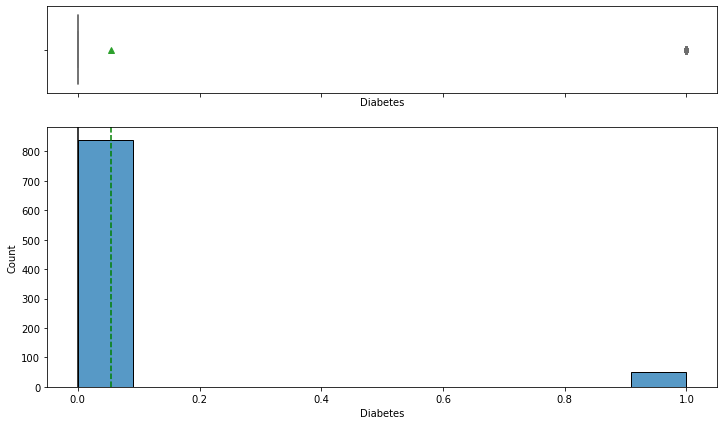

In [47]:
histogram_boxplot(cardiacData,'Diabetes')

In [48]:
print(cardiacData.UnderRisk.value_counts())

no     699
yes    190
Name: UnderRisk, dtype: int64


In [49]:
cardiacData["UnderRisk"] = cardiacData["UnderRisk"].astype('category')
cardiacData.dtypes

Gender                               object
Chain_smoker                          int64
Consumes_other_tobacco_products       int64
HighBP                                int64
Obese                                 int64
Diabetes                              int64
Metabolic_syndrome                    int64
Use_of_stimulant_drugs                int64
Family_history                        int64
History_of_preeclampsia               int64
CABG_history                          int64
Respiratory_illness                   int64
UnderRisk                          category
dtype: object

In [50]:
cardiacData["UnderRisk"] = cardiacData["UnderRisk"].cat.codes
cardiacData

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,0
1,Male,0,1,0,1,0,0,0,1,0,0,0,0
2,Male,0,1,0,1,0,0,0,1,0,0,0,0
3,Male,0,1,0,1,0,0,0,1,0,0,0,0
4,Male,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,Female,0,1,0,1,0,0,0,1,0,0,0,0
885,Male,0,1,0,1,0,0,0,1,0,0,0,0
886,Male,0,0,1,1,0,0,0,1,0,0,0,1
887,Female,0,1,0,0,0,0,1,1,0,0,0,0


In [51]:
# creating dummy variables
cardiacData = pd.get_dummies(
    cardiacData,
    columns=cardiacData.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [52]:
X = cardiacData.drop("UnderRisk" , axis=1)
y = cardiacData.pop("UnderRisk")

In [53]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(533, 13) (178, 13) (178, 13)


In [54]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 533
Number of rows in validation data = 178
Number of rows in test data = 178


In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [56]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [57]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [58]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.787992,0.035088,0.571429,0.066116


In [59]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 114
Before UpSampling, counts of label '0': 419 

After UpSampling, counts of label '1': 419
After UpSampling, counts of label '0': 419 

After UpSampling, the shape of train_X: (838, 13)
After UpSampling, the shape of train_y: (838,) 



In [60]:
lr_res = LogisticRegression(random_state=1)
lr_res.fit(X_train_res, y_train_res)

LogisticRegression(random_state=1)

In [61]:
# Calculating different metrics on train set
log_reg_model_train_perf_res = model_performance_classification_sklearn(
    lr_res, X_train_res, y_train_res
)
print("Training performance:")
log_reg_model_train_perf_res

Training performance:


,Accuracy,Recall,Precision,F1
0,0.673031,0.77327,0.644135,0.70282


In [62]:
#base_estimator for bagging classifier is a decision tree by default
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train_res,y_train_res)

BaggingClassifier(random_state=1)

In [63]:
bagging_model_val_perf = model_performance_classification_sklearn(bagging, X_val, y_val)
print("Validation performance \n",bagging_model_val_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.573034  0.605263    0.27381  0.377049


In [64]:
#Train the random forest classifier
rf =RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [65]:
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("RF Training performance \n", rf_model_train_perf)

RF Training performance 
    Accuracy    Recall  Precision        F1
0  0.801126  0.175439      0.625  0.273973


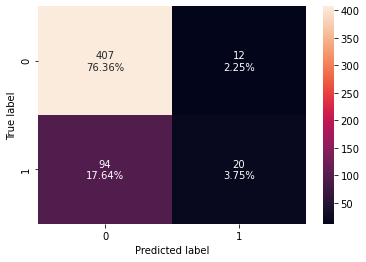

In [66]:
confusion_matrix_sklearn(rf, X_train, y_train)

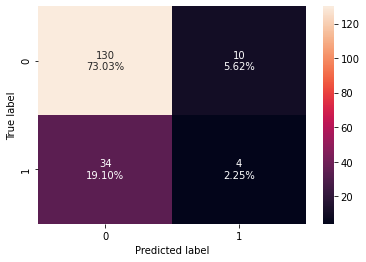

In [67]:
confusion_matrix_sklearn(rf, X_test, y_test)

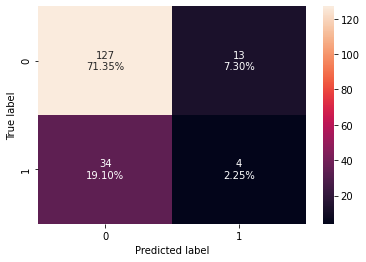

In [68]:
confusion_matrix_sklearn(rf, X_val, y_val)

[0.         0.04347826 0.         0.04545455 0.08695652]


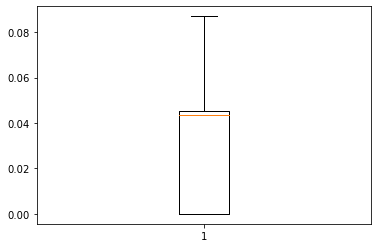

In [77]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_lr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=5
)
# Plotting boxplots for CV scores of model defined above
print(cv_result_lr)
plt.boxplot(cv_result_lr)
plt.show()

[0.08695652 0.04347826 0.         0.13636364 0.08695652]


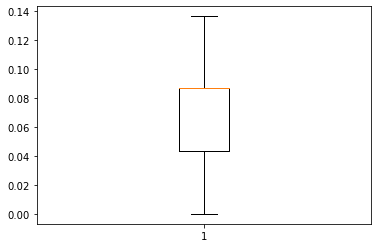

In [75]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bagging = cross_val_score(
    estimator=bagging, X=X_train, y=y_train, scoring=scoring, cv=5
)
# Plotting boxplots for CV scores of model defined above
print(cv_result_bagging)
plt.boxplot(cv_result_bagging)
plt.show()

[0.08695652 0.04347826 0.         0.         0.08695652]


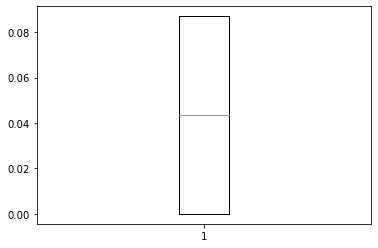

In [76]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_rf = cross_val_score(
    estimator=rf, X=X_train, y=y_train, scoring=scoring, cv=5
)
# Plotting boxplots for CV scores of model defined above
print(cv_result_rf)
plt.boxplot(cv_result_rf)
plt.show()